<a href="https://colab.research.google.com/github/XimenaRamirezA/AI-FIME-2024/blob/main/Pr%C3%A1ctica_2_Procesamiento_geom%C3%A9trico_y_procesamiento_de_histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1: Traslación
Cargar una imagen médica en escala de grises (puede ser una radiografía o resonancia magnética).


In [ ]:
# Cargar la imagen en escala de grises
imagen = cv2.imread("/content/images.jpg", cv2.IMREAD_GRAYSCALE)

# Dimensiones de la imagen
alto, ancho = imagen.shape

# Definir la matriz de traslación (Mueve la imagen 50 px a la derecha y 30 px hacia abajo)
tx, ty = 50, 30  # Desplazamiento en X e Y
M = np.float32([[1, 0, tx], [0, 1, ty]])

# Aplicar la transformación afín
imagen_trasladada = cv2.warpAffine(imagen, M, (ancho, alto))


Aplicar una traslación de (50, 30) píxeles en la dirección (x, y).

Aplicar una traslación con valores decimales, por ejemplo, (20.5, 15.5) píxeles.



In [ ]:
tx, ty = 20.5, 15.5  # Desplazamiento en X e Y con decimales
M = np.float32([[1, 0, tx], [0, 1, ty]])

# Aplicar la traslación con interpolación
imagen_trasladada_dec = cv2.warpAffine(imagen, M, (ancho, alto), flags=cv2.INTER_LINEAR)

Mostrar la imagen original y las imágenes transformadas.

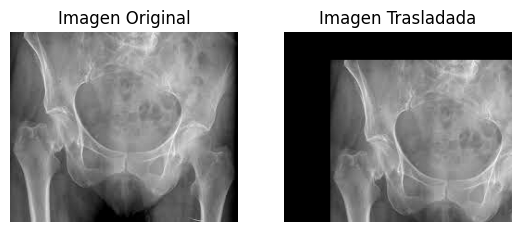

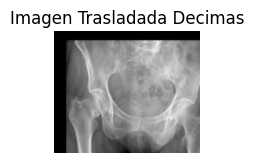

In [ ]:
# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen_trasladada, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.show()

plt.subplot(1, 3, 3)
plt.imshow(imagen_trasladada_dec, cmap="gray")
plt.title("Imagen Trasladada Decimas")
plt.axis("off")

plt.show()

Ejercicio 2: Rotación

Aplicar una rotación de 45° alrededor del centro de la imagen.

Mostrar la imagen original y la imagen rotada.



In [ ]:
# Definir rotación (30° alrededor del centro de la imagen)
angulo = 45
centro = (ancho // 2, alto // 2)  # Centro de la imagen
escala = 1.0  # Sin cambios en el tamaño

M_rotacion = cv2.getRotationMatrix2D(centro, angulo, escala)

# Aplicar rotación sobre la imagen trasladada
imagen_final = cv2.warpAffine(imagen_trasladada, M_rotacion, (ancho, alto))

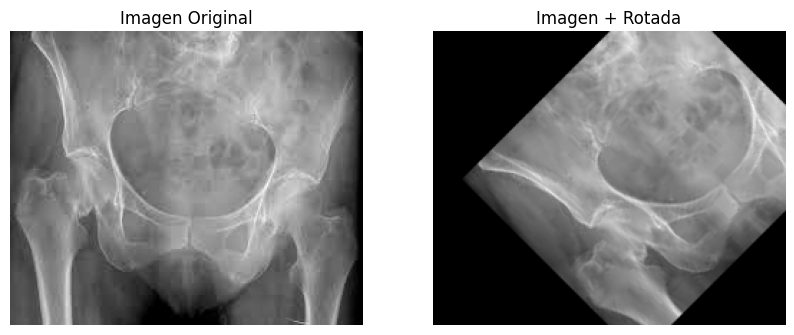

In [ ]:
# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_final, cmap="gray")
plt.title("Imagen + Rotada")
plt.axis("off")

plt.show()

Ejercicio 3: Escala

Aplicar un escalado al 150% de tamaño y otro al 50% de tamaño.



In [ ]:
angulo = 0
escala_1 = 1.5
escala_2 = 0.5
centro = (ancho // 2, alto // 2)  # Centro de la imagen

M_rotacion_escala = cv2.getRotationMatrix2D(centro, angulo, escala_1)
M_rotacion_escala_2 = cv2.getRotationMatrix2D(centro, angulo, escala_2)

# Aplicar rotación y escalado
imagen_escala1 = cv2.warpAffine(imagen_trasladada, M_rotacion_escala, (ancho, alto))
imagen_escala2 = cv2.warpAffine(imagen_trasladada, M_rotacion_escala_2, (ancho, alto))

Mostrar la imagen original y los resultados de escalas.

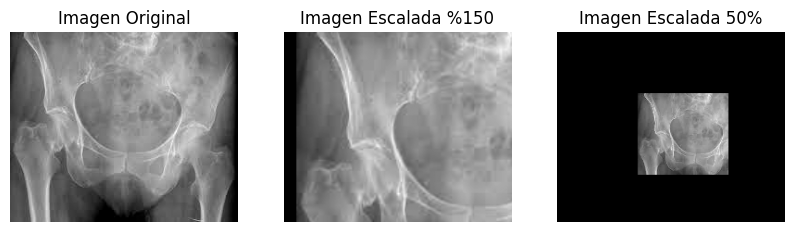

In [ ]:
# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen_escala1, cmap="gray")
plt.title("Imagen Escalada %150")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_escala2, cmap="gray")
plt.title("Imagen Escalada 50%")
plt.axis("off")

plt.show()

Parte II.- Ecualización de histograma


Ejercicio 1: Ecualización.

Cargar una imagen médica con bajo contraste.



In [ ]:
# Cargar la imagen en escala de grises
imagen_histo = cv2.imread("/content/Que-es-la-tomografia-computarizada-o-CAT-de-torax.png", cv2.IMREAD_GRAYSCALE)

# Dimensiones de la imagen
alto_h, ancho_h = imagen.shape

Obtener y visualizar el histograma de la imagen original.



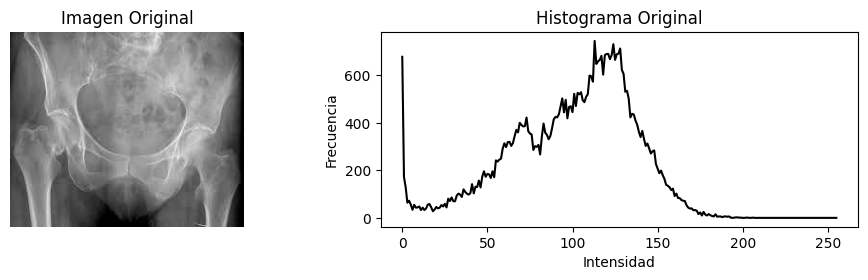

In [ ]:
# Aplicar ecualización de histograma
imagen_ecualizada = cv2.equalizeHist(imagen_histo)

# Calcular histogramas antes y después
hist_original = cv2.calcHist([imagen], [0], None, [256], [0,256])


# Mostrar imágenes y histogramas
plt.figure(figsize=(10,5))

# Imagen Original
plt.subplot(2,2,1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

# Histograma Original
plt.subplot(2,2,2)
plt.plot(hist_original, color="black")
plt.title("Histograma Original")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")



plt.tight_layout()
plt.show()

Aplicar ecualización de histograma para mejorar el contraste.



In [ ]:
hist_ecualizada = cv2.calcHist([imagen_ecualizada], [0], None, [256], [0,256])

Mostrar la imagen original, la imagen mejorada y comparar los histogramas.

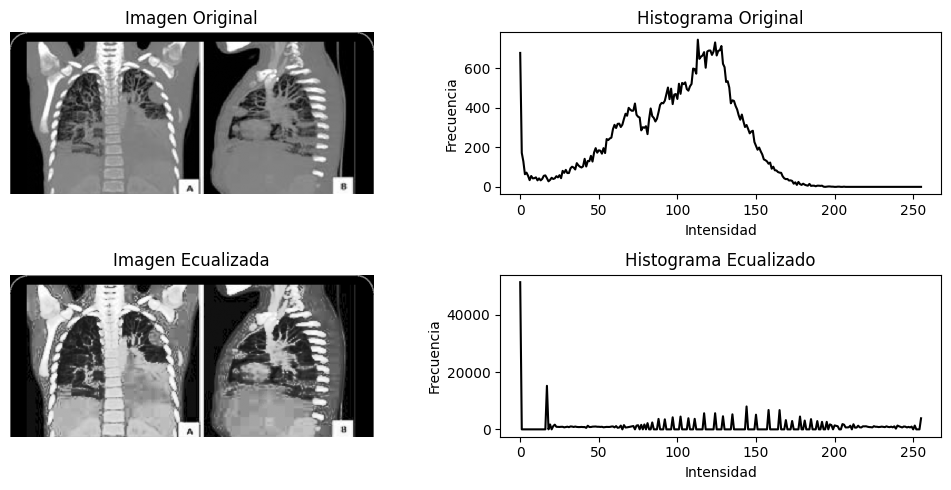

In [ ]:
# Mostrar imágenes y histogramas
plt.figure(figsize=(10,5))

# Imagen Original
plt.subplot(2,2,1)
plt.imshow(imagen_histo, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

# Histograma Original
plt.subplot(2,2,2)
plt.plot(hist_original, color="black")
plt.title("Histograma Original")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Imagen Ecualizada
plt.subplot(2,2,3)
plt.imshow(imagen_ecualizada, cmap="gray")
plt.title("Imagen Ecualizada")
plt.axis("off")

# Histograma Ecualizado
plt.subplot(2,2,4)
plt.plot(hist_ecualizada, color="black")
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()